## **CNN_LSTM Model Training**
---
Following the input and hyperparameter optimizations, we fixed on a model that takes ***four 150 x 150*** images and predicts the 5th image as output. The network consists of ***three Local Feature Learning Blocks (LFLB)***, where each LFLB is made up of Convolution layers, which are followed by ***two LSTM layers.***

---
Network Architecture: 
- LFLB 1
  - Conv2D(filters=32, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=32, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- LFLB 2
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- LFLB 3
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - Conv2D(filters=64, strides=(3,3))
  - BatchNormalization
  - MaxPooling2D(pool_size=(4,4))
  - Dropout(0.4)
- Flatten
- LSTM Layers
  - LSTM_1(num_units=1024, activation='tanh')
  - LSTM_2(num_units=1024, activation='tanh')
- Dense(units=22500, activation='softplus')

---
Organizing the Data: 
- Input images to be present inside the ***INSAT3D_TIR1_PNG*** folder either inside the Drive or on local
- Images to be named as ***0.png*** to ***44.png***

---
Model Outputs:
- ***loss: 55.8962 - val_loss: 339.6556***
- Time taken to train: ***174.56293845176697 seconds***
- Time taken to generate output: ***0.13999462127685547 seconds***

In [1]:
# Run this cell always before generating any model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv

In [2]:
# Required imports for building the model
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Dense, TimeDistributed, BatchNormalization
from keras.layers.core import Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D

Using TensorFlow backend.


(150, 150)


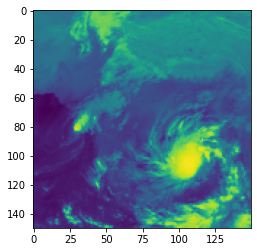

In [3]:
# Read the input images
import os
images = []
# Load in the images
for filepath in os.listdir('drive/My Drive/INSAT3D_TIR1_PNG'):
    img = cv.imread('drive/My Drive/INSAT3D_TIR1_PNG/{0}'.format(filepath),0)
    images.append(cv.resize(img,(150,150),interpolation=cv.INTER_AREA))
first_frame = images[0]
print(first_frame.shape)
plt.imshow(first_frame)

In [4]:
# Build the Model
model = Sequential()
model.add(BatchNormalization(input_shape=(4,150,150,1)))

model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(Convolution2D(64, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4,4))))
model.add(TimeDistributed(Dropout(0.4)))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(LSTM(units=1024, activation='tanh', recurrent_activation='hard_sigmoid', kernel_initializer='glorot_uniform', unit_forget_bias=True, dropout=0.3, recurrent_dropout=0.3, return_sequences=False))
model.add(Dense(22500, activation='softplus'))

model.compile(loss='mean_squared_error', optimizer='nadam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 4, 150, 150, 1)    4         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 4, 148, 148, 32)   320       
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 148, 148, 32)   128       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 146, 146, 32)   9248      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 4, 146, 146, 32)   128       
_________________________________________________________________
time_distributed_5 (TimeDist (None, 4, 36, 36, 32)     0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 36, 36, 32)    

In [5]:
import time
start_time = time.time()
model.fit(np.asarray(images[0:4]).reshape(1,4,150,150,1), np.asarray(images[4]).reshape(1,22500),
          validation_data = (np.asarray(images[4:8]).reshape(1,4,150,150,1), np.asarray(images[8]).reshape(1,22500)),
          batch_size=4, epochs=150)
print("Time taken to train: " + str(time.time() - start_time))

Train on 1 samples, validate on 1 samples
Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 9781.6836 - val_loss: 9033.0967
Epoch 2/150
1/1 [==============================] - 1s 1s/step - loss: 9766.1855 - val_loss: 8940.9492
Epoch 3/150
1/1 [==============================] - 1s 974ms/step - loss: 9567.4736 - val_loss: 8535.8193
Epoch 4/150
1/1 [==============================] - 1s 970ms/step - loss: 9230.8945 - val_loss: 8250.5596
Epoch 5/150
1/1 [==============================] - 1s 974ms/step - loss: 8929.5146 - val_loss: 7983.9346
Epoch 6/150
1/1 [==============================] - 1s 1s/step - loss: 8647.0615 - val_loss: 7728.0142
Epoch 7/150
1/1 [==============================] - 1s 960ms/step - loss: 8380.0107 - val_loss: 7490.2734
Epoch 8/150
1/1 [==============================] - 1s 988ms/step - loss: 8130.3696 - val_loss: 7259.1772
Epoch 9/150
1/1 [==============================] - 1s 959ms/step - loss: 7887.7690 - val_loss: 7035.8047
Epoch 10/150
1/1 [====

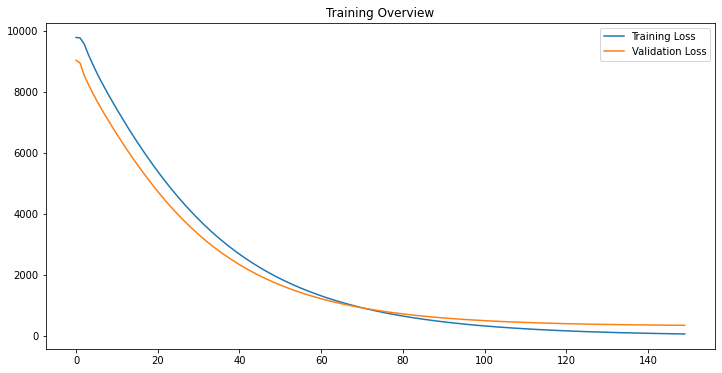

In [6]:
loss = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,6))
plt.title("Training Overview")
plt.plot(loss['loss'], label="Training Loss")
plt.plot(loss['val_loss'], label="Validation Loss")
plt.legend()

In [8]:
output = model.predict(np.array(images[8:12]).reshape(1,4,150,150,1))
output = output.reshape(1,150,150)
output.shape

(1, 150, 150)

Text(0.5, 1.0, 'Predicted 12th Image')

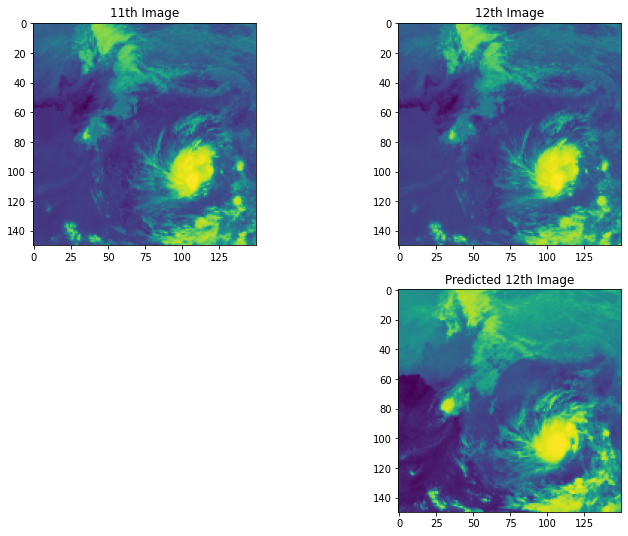

In [9]:
plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(images[10])
plt.title("11th Image")

plt.subplot(222)
plt.imshow(images[11])
plt.title("12th Image")

plt.subplot(224)
plt.imshow(np.asarray(output[0,:,:].reshape(150,150), 'int'))
plt.title("Predicted 12th Image")

In [11]:
model.save('drive/My Drive/MeghNA_Models/[3CNN_2LSTM_Sequence_4_Size_150_TIR].h5')

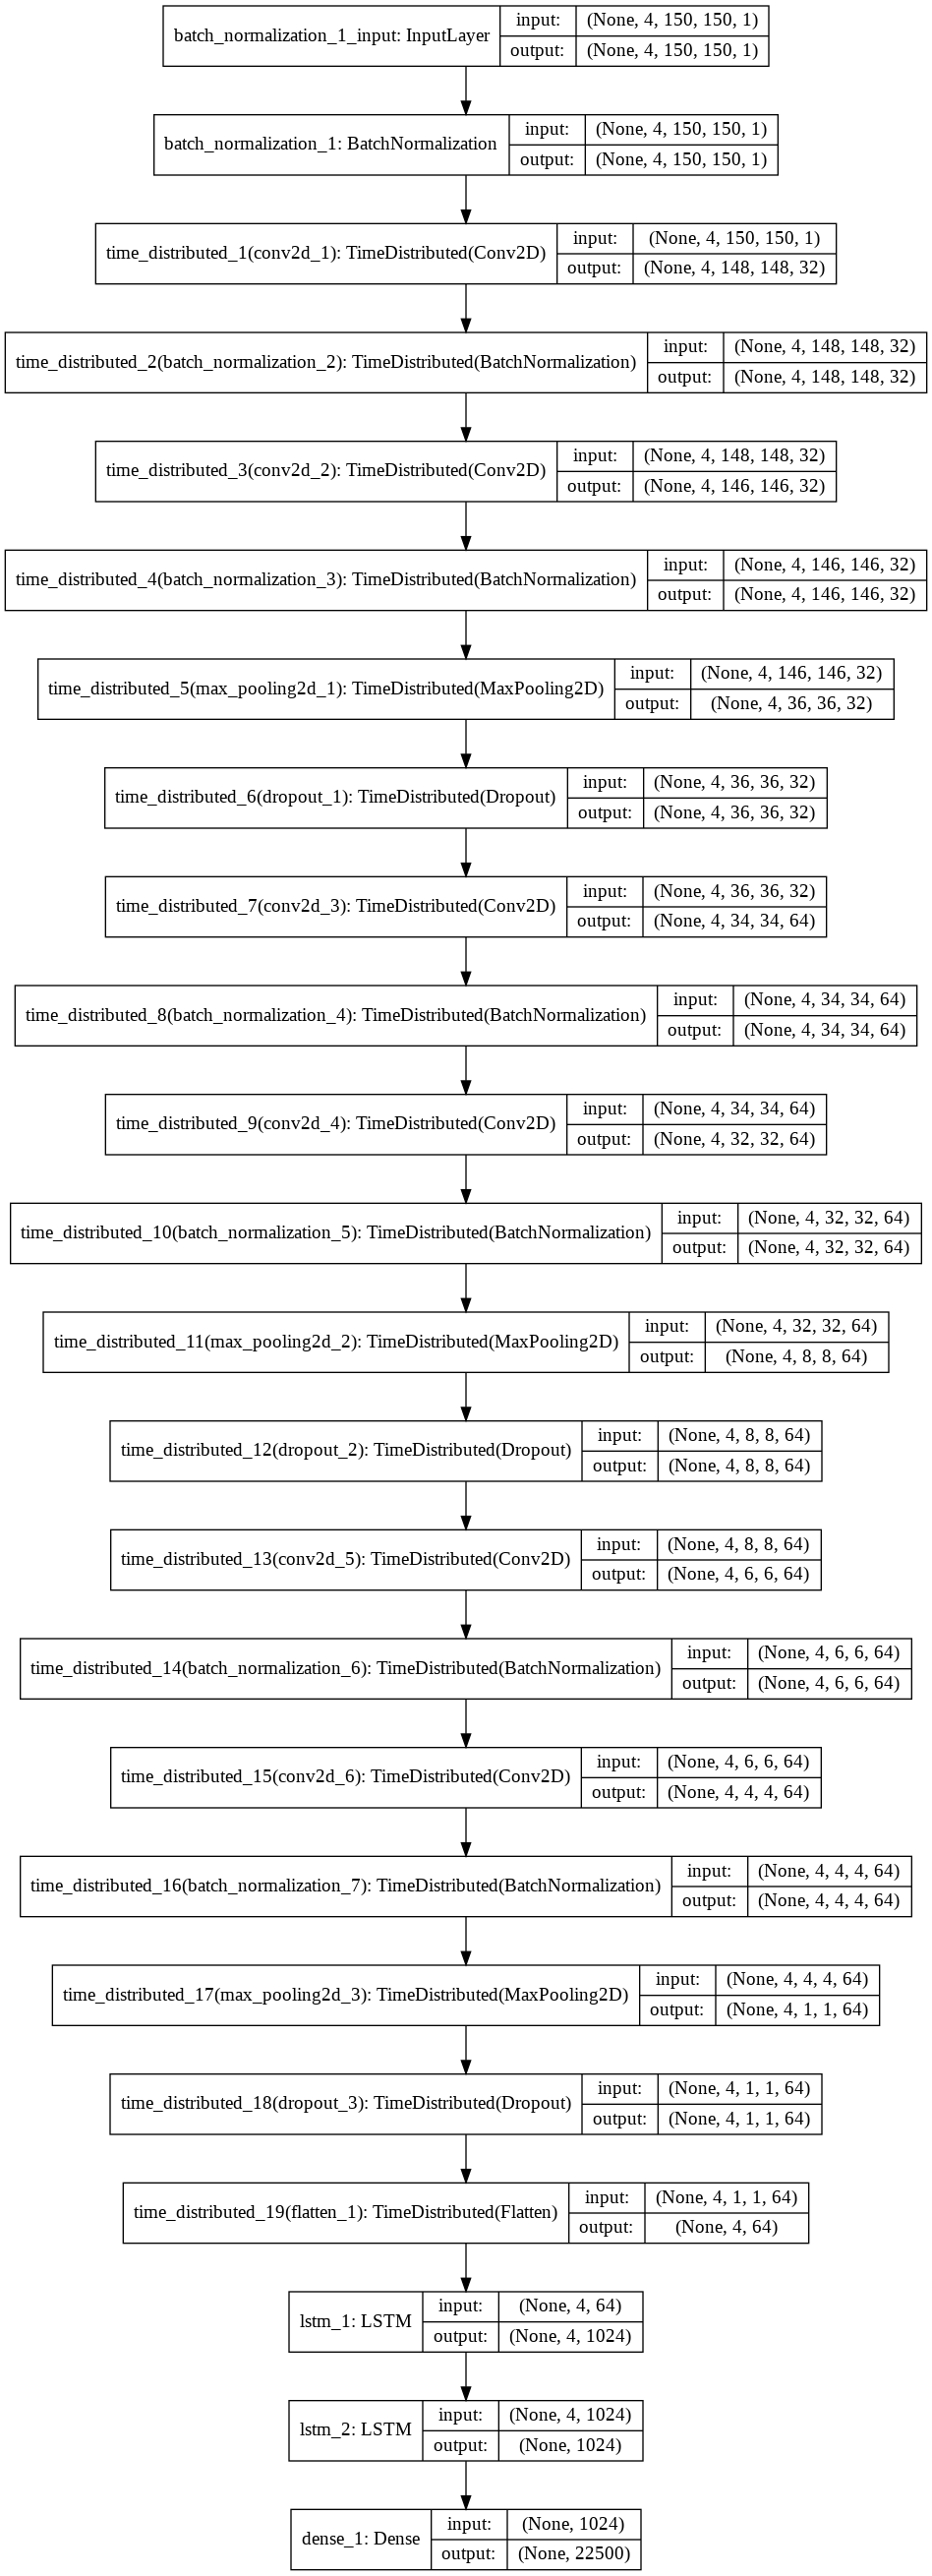

In [12]:
# Visualize the Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='drive/My Drive/MeghNA_Models/CNN_LSTM_model_plot.png', show_shapes=True, show_layer_names=True)

Time taken to regenerate image: 0.13999462127685547
(1, 150, 150)


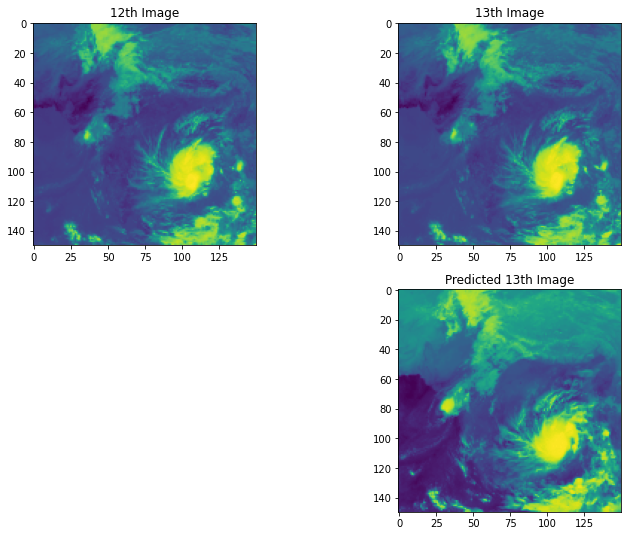

In [14]:
start_time = time.time()
output = model.predict(np.array(images[9:13]).reshape(1,4,150,150,1))
output = output.reshape(1,150,150)
print("Time taken to regenerate image: " + str(time.time() - start_time))
print(output.shape)

plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(images[11])
plt.title("12th Image")

plt.subplot(222)
plt.imshow(images[12])
plt.title("13th Image")

plt.subplot(224)
plt.imshow(np.asarray(output[0,:,:].reshape(150,150), 'int'))
plt.title("Predicted 13th Image")
plt.savefig('drive/My Drive/MeghNA_Models/Predicted_13th.png')